<a href="https://colab.research.google.com/github/Marc-Elie210/My_Basic_Python/blob/master/My_COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#By: Marc-Elie Cheriza

#Objective: 
* Ingest data from the latest New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv
* Filter the data for a chosen county in a chosen state
* Calculate the daily count of new cases and new deaths
* Print the most recent 30 days' worth of data for the selected (NY) county. 
* Perform EDA and show your findings through different plots and visualization techniques.


#Importing the libraries I’ll be using for this analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)


<Figure size 1152x432 with 0 Axes>

#Importing the data and replacing any missing values with NaN





In [2]:
missing_values = ['NA','n/a','na','--','-'] # creating a list of possible missing values
covid_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', na_values = missing_values) # loading in the data and passing the params, 
                                                                                                                                        #turn all the values into NaN that are in the list

#I want to see what information my data contains


In [3]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943233 entries, 0 to 943232
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    943233 non-null  object 
 1   county  943233 non-null  object 
 2   state   943233 non-null  object 
 3   fips    934434 non-null  float64
 4   cases   943233 non-null  int64  
 5   deaths  923068 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 43.2+ MB


In [4]:
covid_data.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


#Our Data contains: 
* Date: Tells us the day of reporting (string) 
* County: The counties within states (string)
* State: The USA States (string)
* FIPS: Five-digit code assigned to US counties (Similar to zipcodes but used for data mapping) (float)
* Cases: The number of cases reported that day. (int)
* Deaths: The number of deaths reported that day. (float)


#Checking which columns hold missing values before continuing.
###We want to make sure our data is not missing too many values in important columns.

In [5]:
# Using the .loc method to access my dataset and the columns where the null values exist 
missing = covid_data.loc[:, covid_data.isnull().any()].columns  # covid_data.isnull().any() returns boolean value True for each column with NaN values

# Creating a list to store the column names for the null values 
col_names = []

for name in missing:
  col_names.append(name)

In [6]:
# Using .isnull to check where values are NaN then .sum() to sum up the total for each column.
amount_missing = covid_data.isnull().sum()

# Creating a list to store the number of nulls
amount = []

for num in amount_missing:
  if num >= 1:
    amount.append(num)

In [7]:
# Creating a dict using the zip() to combine the two list into a list of tuples then converting it using dict()
answer = dict(zip(missing,amount))


print(f'Here are the columns with missing values and the number of values missing:{answer}')

Here are the columns with missing values and the number of values missing:{'fips': 8799, 'deaths': 20165}


Text(0.5, 1.0, 'Missing Values')

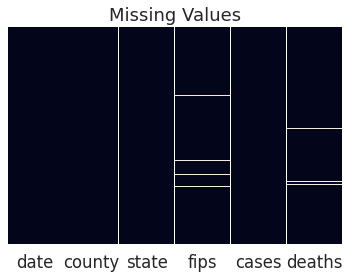

In [51]:
#Creating a heatmap to visualize the missing values in the data 
sns.heatmap(covid_data.isnull(), yticklabels = False, cbar = False).set_title('Missing Values')

###Our death column is allowed to have missing values. This means there were no deaths reported that day. 
###Our FIPS columns are missing due to combined counties in some states such as New York city counties (New York, Kings, Queens, Bronx, Richmond)
###After further examination of the missing columns. I can conclude I can continue.


#Fixing the datatypes for date and deaths
Date is a string and I would like to change it to a DateTime object so that I may be more versatile when working on my analysis
Also death is reported as a float there  can’t be half a dead person. I’ll convert that into a interger.


In [9]:
# I am using the pandas to_datetime() function to change the datatype of the date column from a string to a date time object.
covid_data['date'] = pd.to_datetime(covid_data['date'])
type(covid_data['date'])

pandas.core.series.Series

In [10]:
#Error = ValueError: Cannot convert non-finite values (NA or inf) to integer
#covid_data['deaths'].fillna(0)
#covid_data['deaths'].astype(int)


#Sussex County

I have chosen to work on the state of Delaware Sussex County (AKA lower slower delaware, so I’ve been told by friends I made living in Delaware). My pararents moved down there in 2018 in hopes to move to a more affordable state.

In [11]:
#I am first creating a dataset with only the state of Delaware so I can have for future use if needed. 
Delaware_state = covid_data.query('state == ["Delaware"]')

#Now I'll create a dataset from the Delaware state dataset with only the Sussex county selected.
Sussex_county = Delaware_state.query('county == ["Sussex"]')

Sussex_county.head(10)

,date,county,state,fips,cases,deaths
3295,2020-03-17,Sussex,Delaware,10005.0,1,0.0
3852,2020-03-18,Sussex,Delaware,10005.0,3,0.0
4517,2020-03-19,Sussex,Delaware,10005.0,3,0.0
5296,2020-03-20,Sussex,Delaware,10005.0,7,0.0
6223,2020-03-21,Sussex,Delaware,10005.0,8,0.0
7259,2020-03-22,Sussex,Delaware,10005.0,12,0.0
8405,2020-03-23,Sussex,Delaware,10005.0,20,0.0
9650,2020-03-24,Sussex,Delaware,10005.0,23,0.0
11024,2020-03-25,Sussex,Delaware,10005.0,26,0.0
12572,2020-03-26,Sussex,Delaware,10005.0,33,1.0


#Let's Visualize this data 


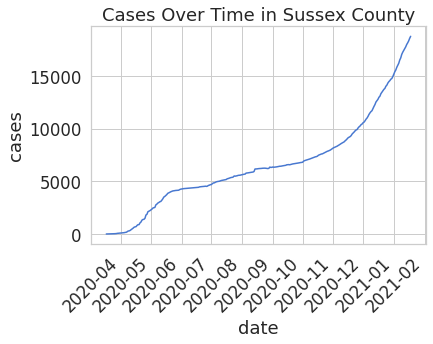

In [12]:
# Creating a simple line plot to visualize the number of cases over time. 
Sussex_plot = sns.lineplot(x = 'date', y = 'cases', data = Sussex_county).set_title('Cases Over Time in Sussex County')

plt.xticks(rotation=45, ha='right') # My x-axis was too bunched up, this line puts it all on an angle 

plt.show()

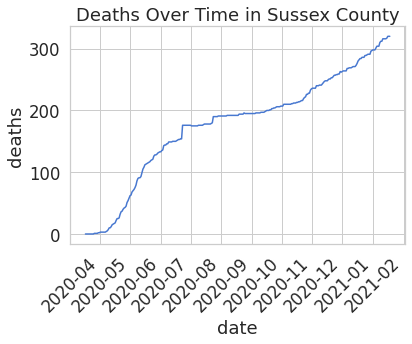

In [13]:
# Creating a simple line plot to visualize the number of deaths over time. 
Sussex_plot = sns.lineplot(x = 'date', y = 'deaths', data = Sussex_county).set_title('Deaths Over Time in Sussex County')

plt.xticks(rotation=45, ha='right') 

plt.show()

# I would like to see a all the months listed


In [14]:
#I am going to create a few new columns so that I may be able to analysis my data in different ways 
Sussex_county['Month_Year'] = Sussex_county['date'].dt.strftime('%m-%Y') # Formatting the date in months name abbreviation and 4 digit years

# These two lines are using lambda functions to take the date column as an argument and apply the datetime .year or .day to each row using apply()
Sussex_county['Year'] = Sussex_county['date'].apply(lambda date: date.year)
Sussex_county['day'] = Sussex_county['date'].apply(lambda date: date.day)

Sussex_county.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,date,county,state,fips,cases,deaths,Month_Year,Year,day
3295,2020-03-17,Sussex,Delaware,10005.0,1,0.0,03-2020,2020,17
3852,2020-03-18,Sussex,Delaware,10005.0,3,0.0,03-2020,2020,18
4517,2020-03-19,Sussex,Delaware,10005.0,3,0.0,03-2020,2020,19
5296,2020-03-20,Sussex,Delaware,10005.0,7,0.0,03-2020,2020,20
6223,2020-03-21,Sussex,Delaware,10005.0,8,0.0,03-2020,2020,21


# Now I'll group the cases by month

In [15]:
# I am creating a new dataframe from the Sussex_county data and grouping them by the 'Month_Year' column.
# I also calculated the total sum for each month
Sussex_Months = Sussex_county.groupby('Month_Year').sum().sort_values('Month_Year', ascending = True).reset_index() # I reset my index because after the groupby 
                                                                                                                    # my index became 'Month_Year'
# I'm keeping the county name in for future use.
Sussex_Months['county'] = 'Sussex'

Sussex_Months


,Month_Year,fips,cases,deaths,Year,day,county
0,01-2021,180090.0,306239,5582.0,36378,171,Sussex
1,03-2020,150075.0,468,8.0,30300,360,Sussex
2,04-2020,300150.0,25836,668.0,60600,465,Sussex
3,05-2020,310155.0,107939,3206.0,62620,496,Sussex
4,06-2020,300150.0,133075,4648.0,60600,465,Sussex
5,07-2020,310155.0,161438,5586.0,62620,496,Sussex
6,08-2020,310155.0,187432,5981.0,62620,496,Sussex
7,09-2020,300150.0,196627,5997.0,60600,465,Sussex
8,10-2020,310155.0,230583,6691.0,62620,496,Sussex
9,11-2020,300150.0,274761,7452.0,60600,465,Sussex


#Which month had the highest reported case and deaths?

In [16]:
#Computing the max for the entire Sussex county
Sussex_max = Sussex_Months.max()

# Creating variables to store the max Month, Cases, and Deaths for Sussex based off the Sussex_max 
Sussex_maxMonth = Sussex_max[0]
Sussex_maxCases = Sussex_max[2] 
Sussex_maxDeath = Sussex_max[3]

print(f'{Sussex_maxMonth} is the month with the highest cases totaling {Sussex_maxCases}')
print()
print(f'{Sussex_maxMonth} is the month with the highest cases totaling {Sussex_maxDeath}')

12-2020 is the month with the highest cases totaling 395289

12-2020 is the month with the highest cases totaling 8616.0


# Visualized max


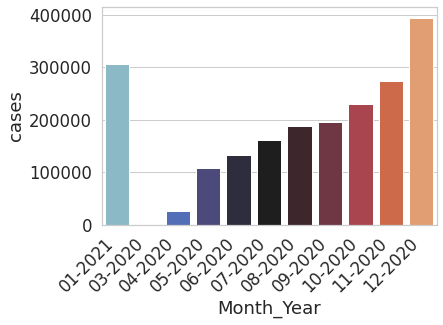

In [17]:
# Creating a barplot for max cases in Sussex county by month 
Sussex_barplot_cases = sns.barplot(x = 'Month_Year', y = 'cases', data = Sussex_Months, palette='icefire')

plt.xticks(rotation=45, ha='right')

plt.show()

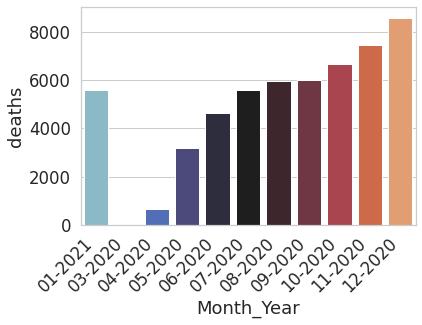

In [18]:
# Creating a barplot for max cases in Sussex county by month 
Sussex_barplot_deaths = sns.barplot(x = 'Month_Year', y = 'deaths', data = Sussex_Months, palette='icefire')

plt.xticks(rotation=45, ha='right')

plt.show()

#Will Jan, 2021 end with higher cases and deaths than Dec, 2020?

In [19]:
#To calculate the percentage of monthly growth, subtract the previous month's measurement from the current month's measurement. 
#Then, divide the result by the previous month's measurement and multiply by 100 to convert the answer into a percentage.

def growth(df):
  """ This function takes one column and computes the percent growth based off its previous values """ 
 
  growth = [] # creating an empty list to store the data
  n = len(df) # using the len(df) to make a stopping point for my while loop and to act as the index number    

  # Calculating the first month Jan 2021 
  last_month = n - 1 
  current = ((df.loc[0] - df.iloc[last_month]) / df.iloc[last_month]) * 100
  growth.append(current.round(2)) # appending the first month to the list first because the most current month will always be index 0 in this data

  # Looping through the until n == 1 because index 1 is the first month and has no previous month to compute
  while n != 1:
    n -= 1 # decreasing n by 1 every iteration 
    change = (df.iloc[n] - df.iloc[n-1]) / df.iloc[n-1] # computing the change in growth
    percentage = (change * 100).round(2) # converting the value of change into a percentage 
    growth.append(percentage) # adding the percentage to the list 
  return growth



temp_list = growth(Sussex_Months['cases'])


In [20]:
print(temp_list)

[-22.53, 43.87, 19.16, 17.27, 4.91, 16.1, 21.31, 23.29, 317.79, 5420.51, -99.85]


In [21]:
def fixed_growth(temp,df,new_col):
  """ This function takes 3 arguments a list, the data, and the new colmun name. It matches the growth percentage with it's actual month. """ 

  fixed_growth = [] #creating an empty list to store the data
  fixed_growth.append(temp[0]) # adding the current month to the front of the list

  # looping through the data backwards and appending the values to the list
  for num in temp[:0:-1]:
    fixed_growth.append(num)

  # Adding the created list back to the dataframe
  df[new_col] = fixed_growth
  return df[new_col]

fixed_growth(temp_list, Sussex_Months,'Cases_Growth_Percentage')

Sussex_Months

,Month_Year,fips,cases,deaths,Year,day,county,Cases_Growth_Percentage
0,01-2021,180090.0,306239,5582.0,36378,171,Sussex,-22.53
1,03-2020,150075.0,468,8.0,30300,360,Sussex,-99.85
2,04-2020,300150.0,25836,668.0,60600,465,Sussex,5420.51
3,05-2020,310155.0,107939,3206.0,62620,496,Sussex,317.79
4,06-2020,300150.0,133075,4648.0,60600,465,Sussex,23.29
5,07-2020,310155.0,161438,5586.0,62620,496,Sussex,21.31
6,08-2020,310155.0,187432,5981.0,62620,496,Sussex,16.10
7,09-2020,300150.0,196627,5997.0,60600,465,Sussex,4.91
8,10-2020,310155.0,230583,6691.0,62620,496,Sussex,17.27
9,11-2020,300150.0,274761,7452.0,60600,465,Sussex,19.16


In [22]:
# Making the first month reported growth value into NaN
Sussex_Months['Cases_Growth_Percentage'].iloc[1] = np.nan
Sussex_Months

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Month_Year,fips,cases,deaths,Year,day,county,Cases_Growth_Percentage
0,01-2021,180090.0,306239,5582.0,36378,171,Sussex,-22.53
1,03-2020,150075.0,468,8.0,30300,360,Sussex,NaN
2,04-2020,300150.0,25836,668.0,60600,465,Sussex,5420.51
3,05-2020,310155.0,107939,3206.0,62620,496,Sussex,317.79
4,06-2020,300150.0,133075,4648.0,60600,465,Sussex,23.29
5,07-2020,310155.0,161438,5586.0,62620,496,Sussex,21.31
6,08-2020,310155.0,187432,5981.0,62620,496,Sussex,16.10
7,09-2020,300150.0,196627,5997.0,60600,465,Sussex,4.91
8,10-2020,310155.0,230583,6691.0,62620,496,Sussex,17.27
9,11-2020,300150.0,274761,7452.0,60600,465,Sussex,19.16


In [23]:
# Creating the death growth percent column

temp_list2 = growth(Sussex_Months['deaths'])
fixed_growth(temp_list2, Sussex_Months, 'Death_Growth_Percentage')


Sussex_Months

,Month_Year,fips,cases,deaths,Year,day,county,Cases_Growth_Percentage,Death_Growth_Percentage
0,01-2021,180090.0,306239,5582.0,36378,171,Sussex,-22.53,-35.21
1,03-2020,150075.0,468,8.0,30300,360,Sussex,NaN,-99.86
2,04-2020,300150.0,25836,668.0,60600,465,Sussex,5420.51,8250.00
3,05-2020,310155.0,107939,3206.0,62620,496,Sussex,317.79,379.94
4,06-2020,300150.0,133075,4648.0,60600,465,Sussex,23.29,44.98
5,07-2020,310155.0,161438,5586.0,62620,496,Sussex,21.31,20.18
6,08-2020,310155.0,187432,5981.0,62620,496,Sussex,16.10,7.07
7,09-2020,300150.0,196627,5997.0,60600,465,Sussex,4.91,0.27
8,10-2020,310155.0,230583,6691.0,62620,496,Sussex,17.27,11.57
9,11-2020,300150.0,274761,7452.0,60600,465,Sussex,19.16,11.37


In [24]:
# Making the first month reported growth value into NaN
Sussex_Months['Death_Growth_Percentage'].iloc[1] = np.nan

Sussex_Months

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Month_Year,fips,cases,deaths,Year,day,county,Cases_Growth_Percentage,Death_Growth_Percentage
0,01-2021,180090.0,306239,5582.0,36378,171,Sussex,-22.53,-35.21
1,03-2020,150075.0,468,8.0,30300,360,Sussex,NaN,NaN
2,04-2020,300150.0,25836,668.0,60600,465,Sussex,5420.51,8250.00
3,05-2020,310155.0,107939,3206.0,62620,496,Sussex,317.79,379.94
4,06-2020,300150.0,133075,4648.0,60600,465,Sussex,23.29,44.98
5,07-2020,310155.0,161438,5586.0,62620,496,Sussex,21.31,20.18
6,08-2020,310155.0,187432,5981.0,62620,496,Sussex,16.10,7.07
7,09-2020,300150.0,196627,5997.0,60600,465,Sussex,4.91,0.27
8,10-2020,310155.0,230583,6691.0,62620,496,Sussex,17.27,11.57
9,11-2020,300150.0,274761,7452.0,60600,465,Sussex,19.16,11.37


#

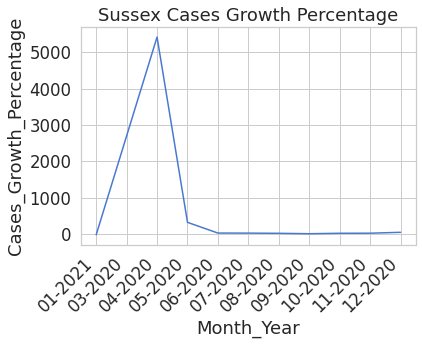

In [54]:
sns.lineplot(x = 'Month_Year', y = 'Cases_Growth_Percentage', data = Sussex_Months).set_title('Sussex Cases Growth Percentage')

plt.xticks(rotation=45, ha='right')

plt.show()

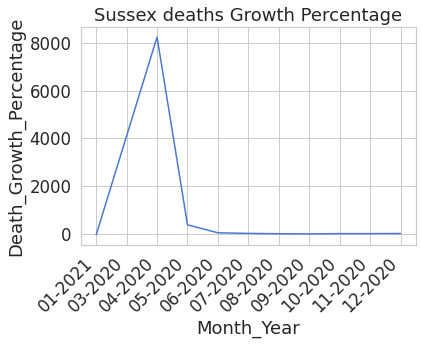

In [55]:
sns.lineplot(x = 'Month_Year', y = 'Death_Growth_Percentage', data = Sussex_Months).set_title('Sussex deaths Growth Percentage')

plt.xticks(rotation=45, ha='right')

plt.show()

####Judging from our data I see that the month of June growth percentage per month has leveled out compared to the high peaks at the beginning of the virus spread in Sussex.

#Taking the average from all of the previous months case & deaths growth rate
###I decided to start the average computation from June rather than March because of the extremely high value would skewe my prediction.


In [27]:
# Using the mean() to calculate the mean for the selected columns and rows

Avg_case_growth = (Sussex_Months['Cases_Growth_Percentage'].iloc[4:]/100).mean()
Avg_death_growth = (Sussex_Months['Death_Growth_Percentage'].iloc[4:]/100).mean()


print(f'The average case growth per-month is {round(Avg_case_growth * 100,2)}%')
print(f'The average death growth per-month is {round(Avg_death_growth * 100,2)}%')

The average case growth per-month is 20.84%
The average death growth per-month is 15.87%


In [28]:
# Computing the possible increase of cases and deaths by multiplying it to Dec totals

Jan_cases = round(Sussex_maxCases * (1 + Avg_case_growth))
Jan_deaths = round(Sussex_maxDeath * (1 + Avg_death_growth))

print(f'The estimated total cases for the current month of Jan-2021 is approximately: {Jan_cases}%')
print()
print(f'The estimated total deaths for the current month of Jan-2021 is approximately: {Jan_deaths}%')


The estimated total cases for the current month of Jan-2021 is approximately: 477684%

The estimated total deaths for the current month of Jan-2021 is approximately: 9983%


In [29]:
Sussex_Months

,Month_Year,fips,cases,deaths,Year,day,county,Cases_Growth_Percentage,Death_Growth_Percentage
0,01-2021,180090.0,306239,5582.0,36378,171,Sussex,-22.53,-35.21
1,03-2020,150075.0,468,8.0,30300,360,Sussex,NaN,NaN
2,04-2020,300150.0,25836,668.0,60600,465,Sussex,5420.51,8250.00
3,05-2020,310155.0,107939,3206.0,62620,496,Sussex,317.79,379.94
4,06-2020,300150.0,133075,4648.0,60600,465,Sussex,23.29,44.98
5,07-2020,310155.0,161438,5586.0,62620,496,Sussex,21.31,20.18
6,08-2020,310155.0,187432,5981.0,62620,496,Sussex,16.10,7.07
7,09-2020,300150.0,196627,5997.0,60600,465,Sussex,4.91,0.27
8,10-2020,310155.0,230583,6691.0,62620,496,Sussex,17.27,11.57
9,11-2020,300150.0,274761,7452.0,60600,465,Sussex,19.16,11.37


#What do we know about Sussex?

* Since June they have been slowly trend up with cases and deaths
* The month of September was the month with the least amount of cases and deaths
* The data has an upward trend in cases and deaths since it’s lowest month September.
* Currently the December has the highest cases with 395,289 cases and the highest deaths 8,616
* Given the Average growth percentage for the months June-December, Jan 2021 may end with approximately  477,684 cases and 9,983 deaths.

#Kent county
#### Kent is the county right above Sussex county. The capital city of Delaware is Dover, which reside's in Kent county. I think it would be interesting to compare the data between the two counties.


   


In [30]:
#Creating the Kent county dataframe from the Delaware state
Kent_county = Delaware_state.query('county == ["Kent"]')
Kent_county

,date,county,state,fips,cases,deaths
3850,2020-03-18,Kent,Delaware,10001.0,3,0.0
4515,2020-03-19,Kent,Delaware,10001.0,4,0.0
5294,2020-03-20,Kent,Delaware,10001.0,4,0.0
6221,2020-03-21,Kent,Delaware,10001.0,5,0.0
7257,2020-03-22,Kent,Delaware,10001.0,5,0.0
...,...,...,...,...,...,...
927325,2021-01-14,Kent,Delaware,10001.0,10970,183.0
930570,2021-01-15,Kent,Delaware,10001.0,11088,186.0
933815,2021-01-16,Kent,Delaware,10001.0,11206,187.0
937060,2021-01-17,Kent,Delaware,10001.0,11363,187.0


#Let's see how the data is trending

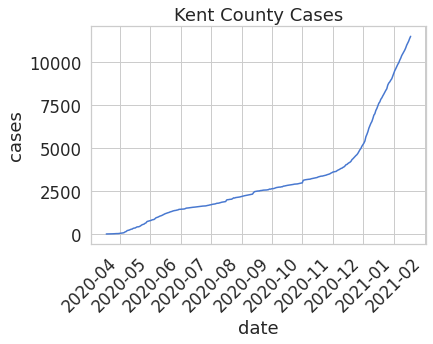

In [56]:
Kent_plot = sns.lineplot(x = 'date', y = 'cases', data = Kent_county).set_title('Kent County Cases')

plt.xticks(rotation=45, ha='right')

plt.show()

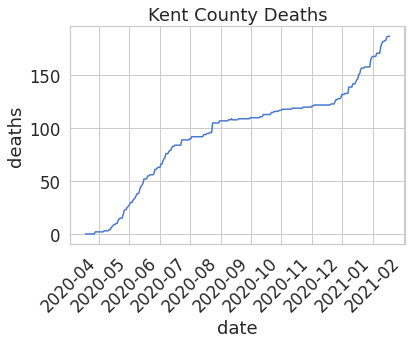

In [58]:
Kent_plot2 = sns.lineplot(x = 'date', y = 'deaths', data = Kent_county).set_title('Kent County Deaths')

plt.xticks(rotation=45, ha='right')

plt.show()

In [33]:
Kent_county['Month_Year'] = Kent_county['date'].dt.strftime('%m-%Y')

Kent_county['Year'] = Kent_county['date'].apply(lambda date: date.year)
Kent_county['day'] = Kent_county['date'].apply(lambda date: date.day)

Kent_county.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,date,county,state,fips,cases,deaths,Month_Year,Year,day
3850,2020-03-18,Kent,Delaware,10001.0,3,0.0,03-2020,2020,18
4515,2020-03-19,Kent,Delaware,10001.0,4,0.0,03-2020,2020,19
5294,2020-03-20,Kent,Delaware,10001.0,4,0.0,03-2020,2020,20
6221,2020-03-21,Kent,Delaware,10001.0,5,0.0,03-2020,2020,21
7257,2020-03-22,Kent,Delaware,10001.0,5,0.0,03-2020,2020,22


#I'm going to group up the month for Kent county as well.

In [34]:
Kent_Months = Kent_county.groupby('Month_Year').sum().sort_values('Month_Year').reset_index()

Kent_Months


,Month_Year,fips,cases,deaths,Year,day
0,01-2021,180018.0,187283,3190.0,36378,171
1,03-2020,140014.0,205,8.0,28280,343
2,04-2020,300030.0,10855,301.0,60600,465
3,05-2020,310031.0,35390,1458.0,62620,496
4,06-2020,300030.0,46966,2419.0,60600,465
5,07-2020,310031.0,59846,2981.0,62620,496
6,08-2020,310031.0,75193,3355.0,62620,496
7,09-2020,300030.0,84241,3386.0,60600,465
8,10-2020,310031.0,102337,3686.0,62620,496
9,11-2020,300030.0,124760,3700.0,60600,465


In [35]:
Kent_Months['county'] = 'Kent'
Kent_Months

,Month_Year,fips,cases,deaths,Year,day,county
0,01-2021,180018.0,187283,3190.0,36378,171,Kent
1,03-2020,140014.0,205,8.0,28280,343,Kent
2,04-2020,300030.0,10855,301.0,60600,465,Kent
3,05-2020,310031.0,35390,1458.0,62620,496,Kent
4,06-2020,300030.0,46966,2419.0,60600,465,Kent
5,07-2020,310031.0,59846,2981.0,62620,496,Kent
6,08-2020,310031.0,75193,3355.0,62620,496,Kent
7,09-2020,300030.0,84241,3386.0,60600,465,Kent
8,10-2020,310031.0,102337,3686.0,62620,496,Kent
9,11-2020,300030.0,124760,3700.0,60600,465,Kent


#Which month had the highest cases and deaths in Kent county?

In [36]:
Kent_max = Kent_Months.max()

Kent_maxMonth = Kent_max[0]
Kent_maxCases = Kent_max[2] 
Kent_maxdeaths = Kent_max[3]


print(f'{Kent_maxMonth} is the month with the highest cases totaling {Kent_maxCases}')
print()
print(f'{Kent_maxMonth} is the month with the highest deaths totaling {Kent_maxdeaths}')

12-2020 is the month with the highest cases totaling 226770

12-2020 is the month with the highest deaths totaling 4557.0


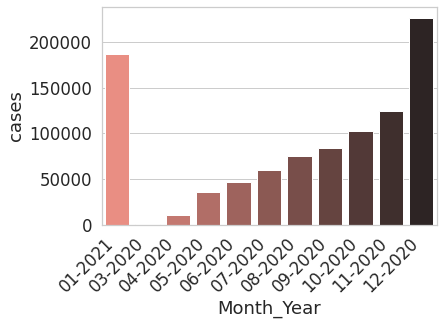

In [37]:
Kent_barplot_cases = sns.barplot(x = 'Month_Year', y = 'cases', data = Kent_Months, palette='dark:salmon_r')

plt.xticks(rotation=45, ha='right')

plt.show()

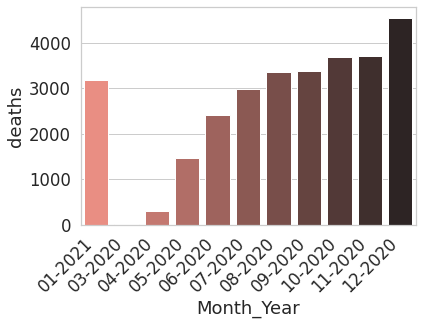

In [38]:
Kent_barplot_cases = sns.barplot(x = 'Month_Year', y = 'deaths', data = Kent_Months, palette='dark:salmon_r')

plt.xticks(rotation=45, ha='right')

plt.show()

In [39]:
# Creating a variable to hold the list from the growth() to pass through fixed_growth()
temp_list3 = growth(Kent_Months['cases'])

fixed_growth(temp_list3, Kent_Months,'Cases_Growth_Percentage')



0      -17.41
1      -99.89
2     5195.12
3      226.02
4       32.71
5       27.42
6       25.64
7       12.03
8       21.48
9       21.91
10      81.76
Name: Cases_Growth_Percentage, dtype: float64

In [40]:
Kent_Months['Cases_Growth_Percentage'].iloc[1] = np.nan
Kent_Months

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Month_Year,fips,cases,deaths,Year,day,county,Cases_Growth_Percentage
0,01-2021,180018.0,187283,3190.0,36378,171,Kent,-17.41
1,03-2020,140014.0,205,8.0,28280,343,Kent,NaN
2,04-2020,300030.0,10855,301.0,60600,465,Kent,5195.12
3,05-2020,310031.0,35390,1458.0,62620,496,Kent,226.02
4,06-2020,300030.0,46966,2419.0,60600,465,Kent,32.71
5,07-2020,310031.0,59846,2981.0,62620,496,Kent,27.42
6,08-2020,310031.0,75193,3355.0,62620,496,Kent,25.64
7,09-2020,300030.0,84241,3386.0,60600,465,Kent,12.03
8,10-2020,310031.0,102337,3686.0,62620,496,Kent,21.48
9,11-2020,300030.0,124760,3700.0,60600,465,Kent,21.91


In [41]:
temp_list4 = growth(Kent_Months['deaths'])

fixed_growth(temp_list4, Kent_Months,'Death_Growth_Percentage')



0      -30.00
1      -99.75
2     3662.50
3      384.39
4       65.91
5       23.23
6       12.55
7        0.92
8        8.86
9        0.38
10      23.16
Name: Death_Growth_Percentage, dtype: float64

In [42]:
Kent_Months['Death_Growth_Percentage'].iloc[1] = np.nan
Kent_Months

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Month_Year,fips,cases,deaths,Year,day,county,Cases_Growth_Percentage,Death_Growth_Percentage
0,01-2021,180018.0,187283,3190.0,36378,171,Kent,-17.41,-30.00
1,03-2020,140014.0,205,8.0,28280,343,Kent,NaN,NaN
2,04-2020,300030.0,10855,301.0,60600,465,Kent,5195.12,3662.50
3,05-2020,310031.0,35390,1458.0,62620,496,Kent,226.02,384.39
4,06-2020,300030.0,46966,2419.0,60600,465,Kent,32.71,65.91
5,07-2020,310031.0,59846,2981.0,62620,496,Kent,27.42,23.23
6,08-2020,310031.0,75193,3355.0,62620,496,Kent,25.64,12.55
7,09-2020,300030.0,84241,3386.0,60600,465,Kent,12.03,0.92
8,10-2020,310031.0,102337,3686.0,62620,496,Kent,21.48,8.86
9,11-2020,300030.0,124760,3700.0,60600,465,Kent,21.91,0.38


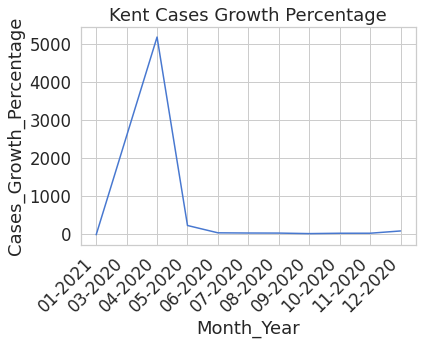

In [60]:
sns.lineplot(x = 'Month_Year', y = 'Cases_Growth_Percentage', data = Kent_Months).set_title('Kent Cases Growth Percentage')

plt.xticks(rotation=45, ha='right')

plt.show()

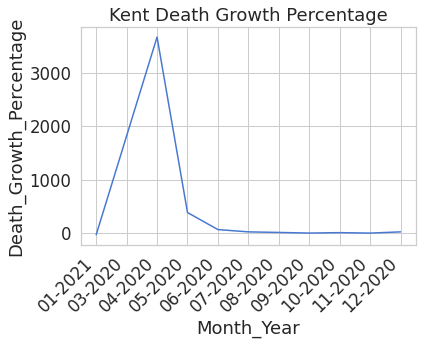

In [59]:
sns.lineplot(x = 'Month_Year', y = 'Death_Growth_Percentage', data = Kent_Months).set_title('Kent Death Growth Percentage')

plt.xticks(rotation=45, ha='right')

plt.show()

In [45]:
# I am using the pandas merge function which allows me to specify how I would like to merge my 2 dataframes
Sussex_Kent = pd.merge(Sussex_Months, Kent_Months, how="outer")

Sussex_Kent.head(30)

,Month_Year,fips,cases,deaths,Year,day,county,Cases_Growth_Percentage,Death_Growth_Percentage
0,01-2021,180090.0,306239,5582.0,36378,171,Sussex,-22.53,-35.21
1,03-2020,150075.0,468,8.0,30300,360,Sussex,NaN,NaN
2,04-2020,300150.0,25836,668.0,60600,465,Sussex,5420.51,8250.00
3,05-2020,310155.0,107939,3206.0,62620,496,Sussex,317.79,379.94
4,06-2020,300150.0,133075,4648.0,60600,465,Sussex,23.29,44.98
5,07-2020,310155.0,161438,5586.0,62620,496,Sussex,21.31,20.18
6,08-2020,310155.0,187432,5981.0,62620,496,Sussex,16.10,7.07
7,09-2020,300150.0,196627,5997.0,60600,465,Sussex,4.91,0.27
8,10-2020,310155.0,230583,6691.0,62620,496,Sussex,17.27,11.57
9,11-2020,300150.0,274761,7452.0,60600,465,Sussex,19.16,11.37


#Sussex and Kent comparison 

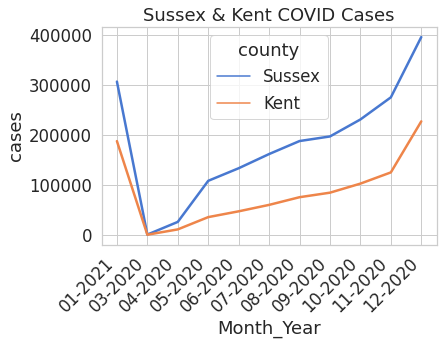

In [61]:
sns.lineplot(data=Sussex_Kent, x = 'Month_Year',linewidth=2.5, y = 'cases',hue='county').set_title('Sussex & Kent COVID Cases')

plt.xticks(rotation=45, ha='right')

plt.show()

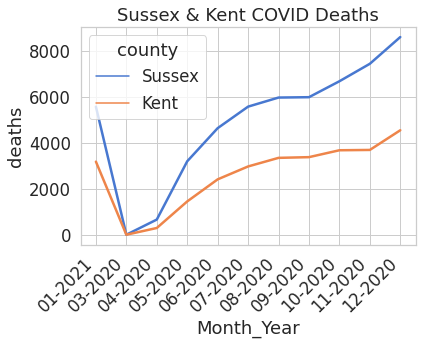

In [63]:

sns.lineplot(data=Sussex_Kent, x = 'Month_Year', linewidth = 2.5, y = 'deaths',hue = 'county').set_title('Sussex & Kent COVID Deaths')

plt.xticks(rotation = 45, ha = 'right')

plt.show()


###It looks like both Sussex and Kent county are following a similar trend when it comes to cases and death. However, Kent seems to have a lower level of both cases and deaths. Let's take a look at both counties deaths given the amount of cases.

Text(0.5, 1.0, 'COVID Deaths Given Cases')

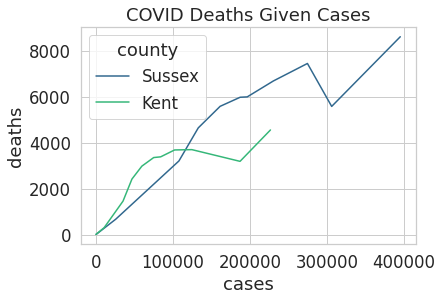

In [64]:
sns.lineplot(x = 'cases', y = 'deaths', data = Sussex_Kent, hue = 'county',palette='viridis').set_title('COVID Deaths Given Cases')


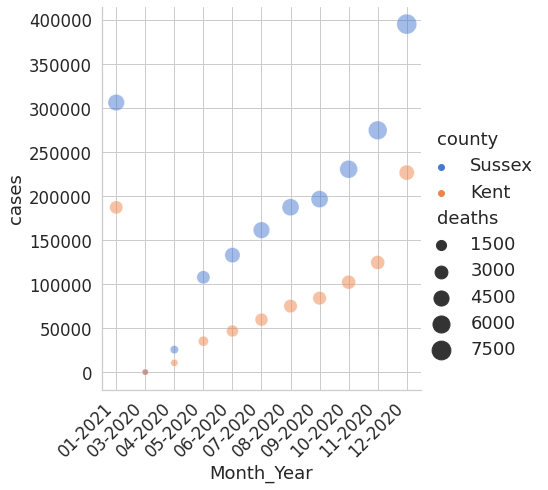

In [49]:
sns.relplot(x="Month_Year", y="cases", hue="county", size="deaths",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=Sussex_Kent)

plt.xticks(rotation = 45, ha = 'right')

plt.show()

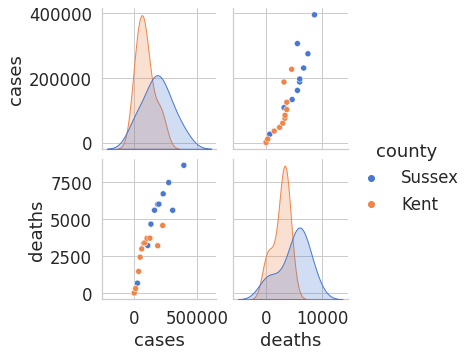

In [50]:
sns.pairplot(Sussex_Kent[['Month_Year', 'cases', 'deaths', 'county']], hue="county")

#It’s interesting to see that both county’s data look similar when I plot them. Kent seems to be going at a slower rate compared to Sussex. 